In [2]:
using Distributions
using Random
using scBayesDeconv
using Plots
using MAT

In [11]:
N = 10000

dataActChiDye = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,0+1]
dataActChi = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,1+1]
dataChiDye = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,2+1]
dataChi = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,3+1]
dataDye = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,4+1]
data = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,5+1]


dataActChiDye2 = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,6+1]
dataActChi2 = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,7+1]
dataChiDye2 = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,8+1]
dataChi2 = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,9+1]
dataDye2 = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,1+10]
data2 = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,1+11];

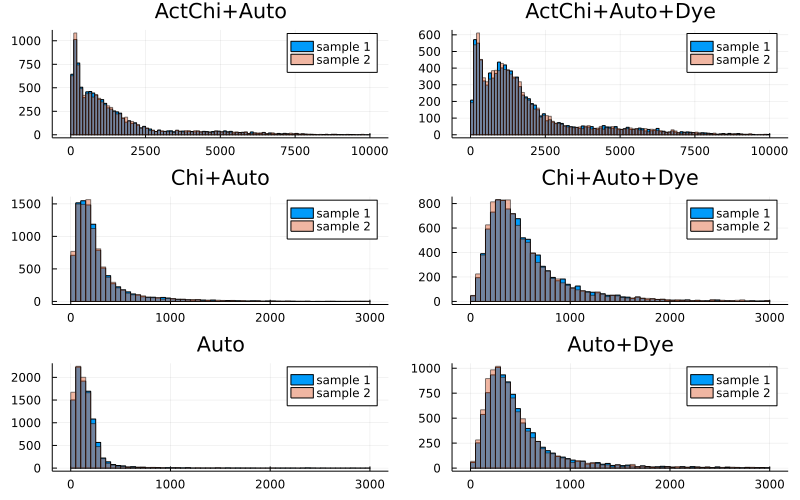

In [36]:
bins = 0:100:10000

p1 = histogram(dataActChi,bins=bins,label="sample 1",title="ActChi+Auto")
histogram!(p1,dataActChi2,bins=bins,label="sample 2",alpha=0.5)

p2 = histogram(dataActChiDye,bins=bins,label="sample 1",title="ActChi+Auto+Dye")
histogram!(p2,dataActChiDye2,bins=bins,label="sample 2",alpha=0.5)

bins = 0:50:3000

p3 = histogram(dataChi,bins=bins,label="sample 1",title="Chi+Auto")
histogram!(p3,dataChi2,bins=bins,label="sample 2",alpha=0.5)

p4 = histogram(dataChiDye,bins=bins,label="sample 1",title="Chi+Auto+Dye")
histogram!(p4,dataChiDye2,bins=bins,label="sample 2",alpha=0.5)

bins = 0:50:3000

p5 = histogram(data,bins=bins,label="sample 1",title="Auto")
histogram!(p5,data2,bins=bins,label="sample 2",alpha=0.5)

p6 = histogram(dataDye,bins=bins,label="sample 1",title="Auto+Dye")
histogram!(p6,dataDye2,bins=bins,label="sample 2",alpha=0.5)

plot(p1,p2,p3,p4,p5,p6,layout=(3,2),size=[800,500])

In [ ]:
dn = infiniteGaussianMixture(reshape(data,length(data),1));

In [41]:
dt = infiniteGaussianMixtureDeconvolution(reshape(dataDye,length(dataDye),1),dn)

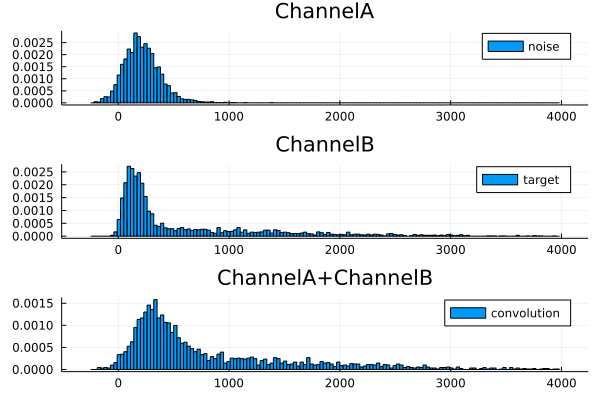

In [54]:
bins = range(-250,4000,step=30)
l1 = histogram(vec(n),normalize=true,bins=bins,label="noise",title="ChannelA")

bins = range(-250,4000,step=30)
l2 = histogram(vec(t),normalize=true,bins=bins,label="target",title="ChannelB")

bins = range(-250,4000,step=30)
l3 = histogram(vec(c),normalize=true,bins=bins,label="convolution",title="ChannelA+ChannelB")

plot(l1,l2,l3,layout=(3,1))

In [56]:
dn = infiniteGaussianMixture(reshape(n,length(n),1),k=2,Σ0 = ones(1,1),κ0=0.01);

In [59]:
dtfitted = infiniteGaussianMixture(reshape(t,length(t),1),k=2,Σ0 = ones(1,1),κ0=0.01);

In [97]:
dc = infiniteGaussianMixture(reshape(c,length(c),1),k=2,Σ0 = ones(1,1),κ0=0.01);

In [57]:
dt = infiniteGaussianMixtureDeconvolution(reshape(c,length(c),1),dn,k=1,Σ0=ones(1,1),κ0=0.01,ν0=0.01,α=1);

In [100]:
x = -200:10:5000
bins = range(-250,4000,step=30)

#Noise
miae = []
for k in 2:10:100
    f1(x) = pdf(dn.samples[k],x)
    f2(x) = pdf(dt.samples[k],x)
    push!(miae, scBayesDeconv.metrics.MIAE(f1,f2,[-250. 4000.],.5))
end

l1 = histogram(vec(n),normalize=true,bins=bins,label="noise",title="ChannelA")

for k in 2:1:100
    y = ([pdf(dn.samples[k],[j]) for j in x])
    plot!(l1,x,y,style=:dash,label=nothing,title=string("Noise"))
end

#Target
miae = []
for k in 2:10:100
    f1(x) = pdf(dtfitted.samples[k],x)
    f2(x) = pdf(dt.samples[k],x)
    push!(miae, scBayesDeconv.metrics.MIAE(f1,f2,[-250. 4000.],.5))
end

bins = range(-250,4000,step=30)
l2 = histogram(vec(t),normalize=true,bins=bins,label="target",title="ChannelB")

for k in 2:1:100
    y = ([pdf(dt.samples[k],[j]) for j in x])
    plot!(l2,x,y,style=:dash,label=nothing,title=string("Target MIO:",round(mean(miae),digits=3)))
end

#Convolution
miae = []
for k in 2:10:100
    f1(x) = pdf(dc.samples[k],x)
    f2(x) = pdf(dt.samples[k],x)
    push!(miae, scBayesDeconv.metrics.MIAE(f1,f2,[-250. 4000.],.5))
end

bins = range(-250,4000,step=30)
l3 = histogram(vec(c),normalize=true,bins=bins,label="convolution",title=string("ChannelA+ChannelB MIO:",mean(miae)))

plot(l1,l2,l3,layout=(3,1),size=[2000,1000])